In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()

data = fetch_california_housing()

casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
X = casas.MedInc
y = casas.MedHouseVal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

# Tem que colocar esse reshape
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))

0.6757739201379245
0.6181666798687345


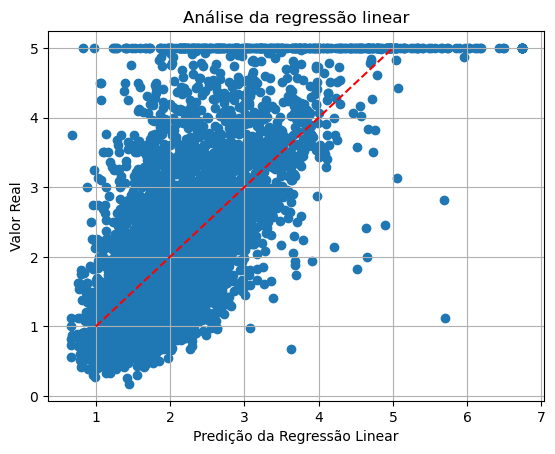

In [43]:
fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)
ax.set_title('Análise da regressão linear')
ax.set_xlabel('Predição da Regressão Linear')
ax.set_ylabel('Valor Real')
ax.plot([1, 5], [1, 5], "--r")
plt.grid()

# Utilizando todas as colunas

In [47]:
y_total = casas.MedHouseVal
X_total = casas.drop('MedHouseVal', axis=1)

X_total_train, X_total_test, y_total_train, y_total_test = train_test_split(X_total, y_total, test_size=0.33, random_state=3)

# Mais de uma coluna não precisa do .values.reshape(-1, 1)
model.fit(X_total_train, y_total_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_total_test)

print(mean_absolute_error(y_true=y_total_test, y_pred=y_pred))
print(mean_squared_error(y_true=y_total_test, y_pred=y_pred))

0.5293372393634862
0.5286820556466298


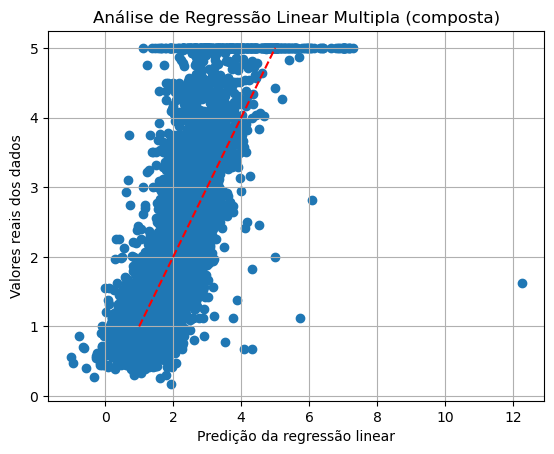

In [49]:
fig2, ax2 = plt.subplots()

ax2.scatter(y_pred, y_test)
ax2.set_title('Análise de Regressão Linear Multipla (composta)')
ax2.set_xlabel('Predição da regressão linear')
ax2.set_ylabel('Valores reais dos dados')
# plot de 1 a 5 pois os dados só conseguem prever de 1 a 5
ax2.plot([1, 5], [1, 5], '--r')
plt.grid()

# É possível observar uma proximidade muito maior dos dados com as retas